# Employee Performance and Retention Analysis  

## Introduction  
As a product manager leading a team of engineers, one of my key challenges is evaluating employee performance in a fair and objective manner. I aim to leverage key metrics to assess performance and eliminate subjective bias from the process. Another significant challenge is identifying employees who may be at risk of leaving the team or company. Being able to predict this risk based on specific metrics would allow me to take proactive measures to improve retention.  

## Objective  
Ensuring my team’s productivity and keeping employees motivated is a crucial responsibility. To support this, I am working on a capstone project using a Kaggle dataset focused on employee productivity and other key data points. My goal is to apply various modeling techniques to answer the following questions:  

### Key Research Questions  
- **Employee Resignation Prediction:** Use classification techniques to identify key factors influencing an employee’s decision to resign.  
- **Performance Evaluation:** Apply classification models to assess employee performance scores.  
- **Salary Prediction:** Determine the ideal monthly salary for an employee based on performance scores and other factors such as job title and years of experience.  

## Expected Outcomes  
Through this project, I hope to gain insights that can be applied in my workplace, using similar modeling techniques to enhance decision-making and achieve my goals as a manager.  


## Data Source
https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data?resource=download

The dataset provides data on employee demographics and performance. The key columns in this dataset are
- Years_At_Company: The number of years the employee has been working for the company.
- Job_Title: The role held by the employee (e.g., Manager, Analyst, Developer).
- Gender: Gender of the employee (Male, Female, Other).
- Department: The department in which the employee works (e.g., Sales, HR, IT).
- Performance_Score: Employee's performance rating (1 to 5 scale).
- Monthly_Salary: The employee's monthly salary in USD, correlated with job title and performance score.
- Work_Hours_Per_Week: Number of hours worked per week.
- Overtime_Hours: Total overtime hours worked in the last year.
- Remote_Work_Frequency - Percentage of time worked remotely (0%, 25%, 50%, 75%, 100%)
- Team_Size: Number of people in the employee's team.
- Training_Hours - Number of hours of training for the employee
- Promotions: Number of promotions received during their tenure.
- Employee_Satisfaction_Score: Employee satisfaction rating (1.0 to 5.0 scale).
- Resigned: Boolean value indicating if the employee has resigned.
<br/>
<br/>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

from sklearn import set_config
set_config(display="diagram")
import time

In [2]:
# Load the dataset
employee_df = pd.read_csv("data/employee.csv")

In [3]:
employee_df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
employee_df.describe(include='all')

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
count,100000.000000,100000,100000,100000.000000,100000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000
unique,NaN,9,3,NaN,7,3650,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Marketing,Male,NaN,Specialist,2020-09-29 08:03:05.556036,NaN,Bachelor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,11216,48031,NaN,14507,46,NaN,50041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89990
mean,50000.500000,NaN,NaN,41.029410,NaN,NaN,4.476070,NaN,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088,NaN
std,28867.657797,NaN,NaN,11.244121,NaN,NaN,2.869336,NaN,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719,NaN
min,1.000000,NaN,NaN,22.000000,NaN,NaN,0.000000,NaN,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,NaN
25%,25000.750000,NaN,NaN,31.000000,NaN,NaN,2.000000,NaN,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000,NaN
50%,50000.500000,NaN,NaN,41.000000,NaN,NaN,4.000000,NaN,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000,NaN
75%,75000.250000,NaN,NaN,51.000000,NaN,NaN,7.000000,NaN,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000,NaN


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

<br/>
<br/>

## Cleaning and sanitizing the dataset
<br/>

In [6]:
#check for null values
print(employee_df.isnull().sum().sort_values())

Employee_ID                    0
Promotions                     0
Training_Hours                 0
Team_Size                      0
Remote_Work_Frequency          0
Sick_Days                      0
Overtime_Hours                 0
Projects_Handled               0
Work_Hours_Per_Week            0
Monthly_Salary                 0
Performance_Score              0
Education_Level                0
Years_At_Company               0
Hire_Date                      0
Job_Title                      0
Age                            0
Gender                         0
Department                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


<br/>
<br/>
No null values in the provided dataset

**Hire date and Employee ID are not relevant in the analysis and can be removed**
<br/>

In [7]:
#dropping employee id and Hire date as it is not relevant to the data predictions
data = employee_df.drop(['Employee_ID', 'Hire_Date'], axis=1)

#Dropping duplicates
data = data.drop_duplicates()
print('Size of dataset after data cleaning ', data.shape)

Size of dataset after data cleaning  (100000, 18)


In [8]:
# unique values in department
print(data['Department'].unique())

['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']


In [9]:
# unique values in Gender
print(data['Gender'].unique())

['Male' 'Female' 'Other']


In [10]:
# Unique values in Job Title
print(data['Job_Title'].unique())

['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']


In [11]:
# unique values in education level
print(data['Education_Level'].unique())

['High School' 'Bachelor' 'Master' 'PhD']


## Data transformation

In [12]:
# Label encoder
columns_to_encode = ['Department', 'Gender', 'Education_Level', 'Job_Title', 'Resigned']
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    
data

,Department,Gender,Age,Job_Title,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,4,1,55,5,2,1,5,6750.0,33,32,22,2,0,14,66,0,2.63,0
1,2,1,29,2,0,1,5,7500.0,34,34,13,14,100,12,61,2,1.72,0
2,2,1,55,5,8,1,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,0,0,48,0,7,0,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,1,0,36,0,3,0,2,4800.0,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,1,27,6,1,0,4,4900.0,55,46,5,3,75,16,48,2,1.28,0
99996,4,0,36,1,6,2,5,8250.0,39,35,7,0,0,10,77,1,3.48,1
99997,7,1,53,0,8,1,2,4800.0,31,13,6,5,0,5,87,1,2.60,0
99998,3,0,22,1,9,1,5,8250.0,35,43,10,1,75,2,31,1,3.10,0


## **Goal 1 : What factors influence an employee's decision to resign**

**Data Preparation**

Resignation is the dependent variable.

In [13]:
# Building the X and y data
X = data.drop('Resigned', axis=1)
y = data['Resigned']

# Visualizing correlation of different parameters
corr_matrix = X.corrwith(y)

# Get the absolute values of the correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Get the maximum correlation value for each column (excluding self-correlation)
max_corr_values = abs_corr_matrix.sort_values(ascending=False)
max_corr_values = max_corr_values[max_corr_values < 1]  # Remove self-correlation

# Get the top 10 maximum correlation pairs
n = 10
top_n_corr_pairs = max_corr_values.head(n)

print("The top 10 factors having high correlationw with resignation decision")
print(top_n_corr_pairs)

The top 10 factors having high correlationw with resignation decision
Remote_Work_Frequency          0.007205
Age                            0.003519
Employee_Satisfaction_Score    0.002830
Performance_Score              0.002714
Overtime_Hours                 0.002383
Projects_Handled               0.001713
Sick_Days                      0.001711
Monthly_Salary                 0.001524
Job_Title                      0.001493
Gender                         0.001243
dtype: float64


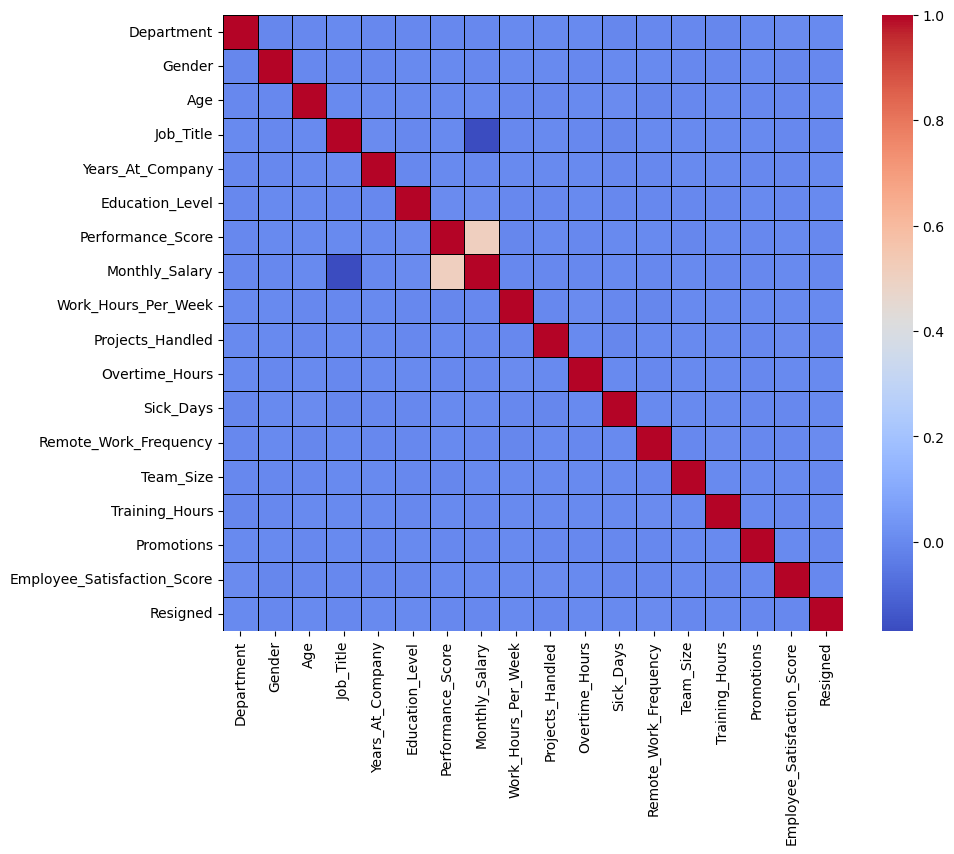

In [14]:
# Plot the correlation matrix
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, linecolor='black',
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [15]:
# Build the column transformer
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

coltransformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

**Building the training and test dataset**
<br/>

In [16]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data analytics using classification techniques**

In [17]:
# Baseline model using dummy classifier

baseline_pipe = Pipeline([
    ('transformer', coltransformer),
    ('dummy_cls', DummyClassifier())
])

baseline_pipe.fit(X_train, y_train)
baseline_test_score = baseline_pipe.score(X_test, y_test)
baseline_train_score = baseline_pipe.score(X_train, y_train)
baseline_mse = mean_squared_error(y_test, baseline_pipe.predict(X_test))
baseline_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Department', 'Gender',
                                                   'Age', 'Job_Title',
                                                   'Years_At_Company',
                                                   'Education_Level',
                                                   'Performance_Score',
                                                   'Monthly_Salary',
                                                   'Work_Hours_Per_Week',
                                                   'Projects_Handled',
                                                   'Overtime_Hours',
                                                   'Sick_Days',
                                                   'Remote_Work_Frequency',
                                                   'Team_Size',
                                                   'Training_Hours',
                                                   'Promotions',
                                                   'Employee_Satisfaction_Score']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('dummy_cls', DummyClassifier())])

In [18]:
print("Baseline test score ", baseline_test_score)
print("Baseline train score ", baseline_train_score)
print("Baseline mse ", baseline_mse)

Baseline test score  0.90145
Baseline train score  0.8995125
Baseline mse  0.09855


In [19]:
# Baseline model with decision tree with default parameters
tree_pipe = Pipeline([
    ('transformer', coltransformer),
    ('tree', DecisionTreeClassifier(random_state=42))
])

tree_pipe.fit(X_train, y_train)
tree_score = tree_pipe.score(X_test, y_test)
tree_baseline_mse = mean_squared_error(y_test, tree_pipe.predict(X_test))
tree_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Department', 'Gender',
                                                   'Age', 'Job_Title',
                                                   'Years_At_Company',
                                                   'Education_Level',
                                                   'Performance_Score',
                                                   'Monthly_Salary',
                                                   'Work_Hours_Per_Week',
                                                   'Projects_Handled',
                                                   'Overtime_Hours',
                                                   'Sick_Days',
                                                   'Remote_Work_Frequency',
                                                   'Team_Size',
                                                   'Training_Hours',
                                                   'Promotions',
                                                   'Employee_Satisfaction_Score']),
                                                 ('cat', OneHotEncoder(),
                                                  [])])),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [20]:
print('Decision Tree Classifier Baseline test score ', tree_score)
print('Decision Tree Baseline MSE ', tree_baseline_mse)

Decision Tree Classifier Baseline test score  0.8001
Decision Tree Baseline MSE  0.1999


**Try different classification models**

Using GridSearch to try out various hyperparameters for each model

In [21]:
grid_models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000, random_state=42), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(random_state=42), {'svc__kernel': ['linear'], 'svc__C': [0.1, 1]}),
    'decisiontreeclassifier': (DecisionTreeClassifier(random_state=42), {'decisiontreeclassifier__criterion' : ['gini', 'entropy'], 'decisiontreeclassifier__max_depth' : [5, 10, 20], 'decisiontreeclassifier__max_features' : ['sqrt', 'log2']})
}

In [22]:
grid_results = []
best_params = []
best_pipelines = {}
for name, (model, params) in grid_models.items() :
    pipe = Pipeline([
        ('transformer', coltransformer),
        (name, model)
    ])
    grid = GridSearchCV(pipe, param_grid=params, cv = 5, n_jobs=1)
    # Fit the model and measure the time
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()
    train_time = (end_time - start_time)/len(grid.cv_results_['mean_fit_time'])
    
    # Get the scores
    best_est = grid.best_estimator_
    best_pipelines[name] = best_est
    train_score = best_est.score(X_train, y_train)
    test_score = best_est.score(X_test, y_test)
    # Build the results array
    grid_results.append([name, train_time, train_score, test_score])
    best_params.append(grid.best_params_)

# Build the dataframe from results array
grid_data = pd.DataFrame(grid_results, columns=['Model', 'Train Time', 'Train Score', 'Test Score'])
grid_data.set_index('Model', inplace=True)

print(grid_data)

                        Train Time  Train Score  Test Score
Model                                                      
knn                       3.446571     0.899988     0.89965
logisticregression        0.215782     0.899513     0.90145
svc                     124.833681     0.899513     0.90145
decisiontreeclassifier    0.427650     0.899537     0.90140


/opt/anaconda3/envs/pandas/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:
# Print the best hyperparameters chosen in grid search for each model
for best_param in best_params:
    print(best_param)

{'knn__n_neighbors': 7}
{'logisticregression__C': 0.1}
{'svc__C': 0.1, 'svc__kernel': 'linear'}
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_features': 'sqrt'}


Text(0.5, 0.98, 'Models with Grid Parameters')

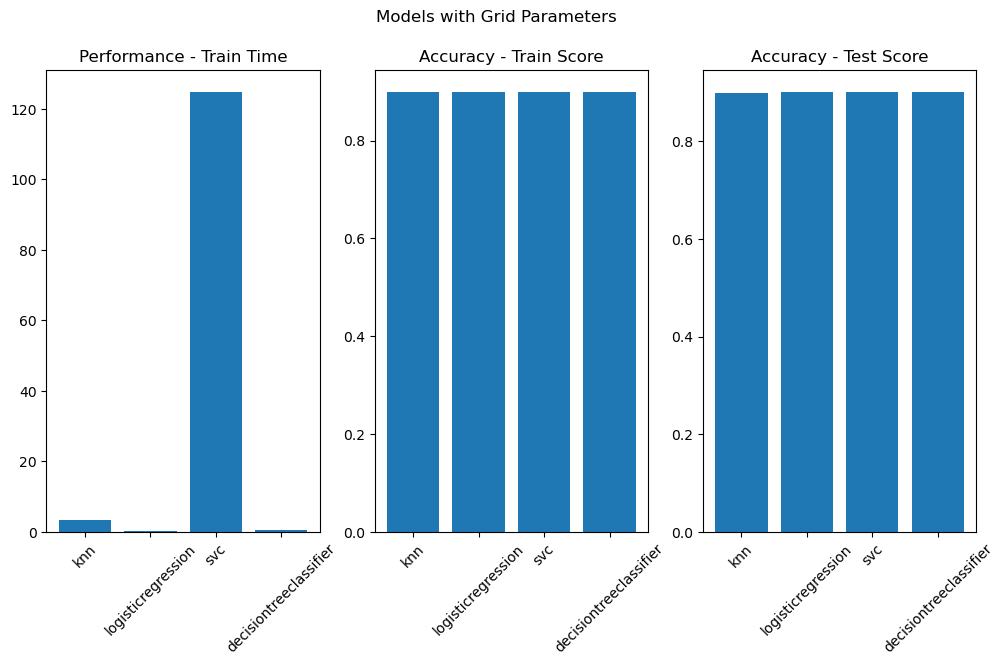

In [24]:
#plot the data for grid parameters
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(12, 6)
ax1.bar(grid_data.index, grid_data['Train Time'])
ax1.tick_params(axis='x', rotation=45)
ax2.bar(grid_data.index, grid_data['Train Score'])
ax2.tick_params(axis='x', rotation=45)
ax3.bar(grid_data.index, grid_data['Test Score'])
ax3.tick_params(axis='x', rotation=45)
ax1.title.set_text('Performance - Train Time')
ax2.title.set_text('Accuracy - Train Score')
ax3.title.set_text('Accuracy - Test Score')
fig.suptitle('Models with Grid Parameters')

**Getting the features that are the most important in resignation decision**

In [25]:
# Feature importance from Decision Tree
importances_tree = best_pipelines['decisiontreeclassifier'].named_steps['decisiontreeclassifier'].feature_importances_
feature_importance_tree_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances_tree})
feature_importance_tree_df = feature_importance_tree_df.sort_values(by='importance', ascending=False)
print("\nFeature Importance from Decision Tree:")
print(feature_importance_tree_df)

# Coefficients from Linear regression
coefficients_logistic = best_pipelines['logisticregression'].named_steps['logisticregression'].coef_
coefficients_logistic_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients_logistic.ravel()})
coefficients_logistic_df = coefficients_logistic_df.sort_values(by='coefficient', ascending=False)
print("\nCoefficients from Logistic Regression:")
print(coefficients_logistic_df)

# Feature importance using permutation for KNN
result_knn = permutation_importance(best_pipelines['knn'], X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances_knn = pd.DataFrame({'feature': X_test.columns, 'importance': result_knn.importances_mean})
perm_importances_knn = perm_importances_knn.sort_values(by='importance', ascending=False)
print("\nPermutation Importance from KNN:")
print(perm_importances_knn)

# Feature importance using permutation for SVC
coefficients_svc = best_pipelines['svc'].named_steps['svc'].coef_
perm_importances_svc = pd.DataFrame({'feature': X_test.columns, 'importance': coefficients_svc.ravel()})
perm_importances_svc = perm_importances_svc.sort_values(by='importance', ascending=False)
print("\nPermutation Importance from SVC:")
print(perm_importances_svc)


Feature Importance from Decision Tree:
                        feature  importance
10               Overtime_Hours    0.195492
14               Training_Hours    0.153816
2                           Age    0.124334
8           Work_Hours_Per_Week    0.097065
11                    Sick_Days    0.076262
12        Remote_Work_Frequency    0.061340
16  Employee_Satisfaction_Score    0.058778
9              Projects_Handled    0.057470
3                     Job_Title    0.052444
13                    Team_Size    0.048060
6             Performance_Score    0.019494
7                Monthly_Salary    0.019370
4              Years_At_Company    0.014401
0                    Department    0.013605
5               Education_Level    0.008069
1                        Gender    0.000000
15                   Promotions    0.000000

Coefficients from Logistic Regression:
                        feature  coefficient
12        Remote_Work_Frequency     0.024590
10               Overtime_Hours     0.

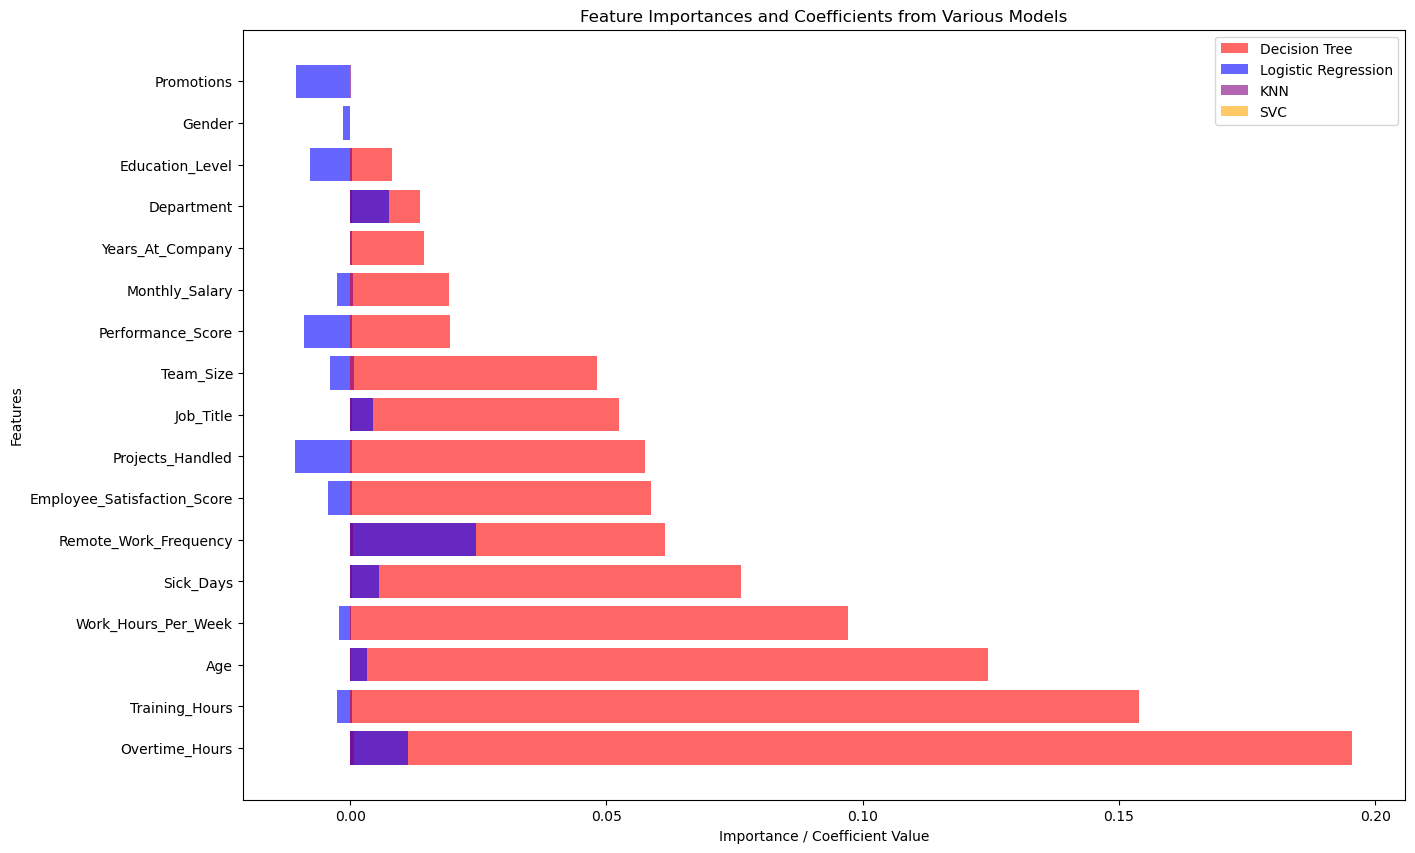

In [26]:
# Plotting the feature importances and coefficients
plt.figure(figsize=(15, 10))

# Plot Decision Tree feature importance
plt.barh(feature_importance_tree_df['feature'], feature_importance_tree_df['importance'], color='red', alpha=0.6, label='Decision Tree')

# Plot Linear Regression coefficients
plt.barh(coefficients_logistic_df['feature'], coefficients_logistic_df['coefficient'], color='blue', alpha=0.6, label='Logistic Regression')

# Plot KNN permutation importance
plt.barh(perm_importances_knn['feature'], perm_importances_knn['importance'], color='purple', alpha=0.6, label='KNN')

# Plot SVR permutation importance
plt.barh(perm_importances_svc['feature'], perm_importances_svc['importance'], color='orange', alpha=0.6, label='SVC')

plt.xlabel('Importance / Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importances and Coefficients from Various Models')
plt.legend()
plt.show()

### **Summary**
The data clearly indicates that overtime_hours has a significant influence on the decision to resign. Other factors that directly correlate to resignation are Remove_work_frequency, Work_Hours_Per_Week and age. Factors which are inversely correlated (from logisctic regression analysis) are Promotions, Monthly_Salary and Job_Title. Better salary and higher promotions influence the decision to stay

In terms of models, logistic regression and decisionTree classifier performed the best - both in terms of performance and accuracy.

## Goal 2 - What factors affect the performance score of employee

Performance score is a rating between 1 and 5. Goal is to determine the factors that affect the performance the most

**Data cleaning**
Removing columns like monthly_salary and Job_title as these are derived from performance score.

Also selecting only current employees and hence removing employees that have already resigned.

In [28]:
perf_data = employee_df.loc[employee_df['Resigned'] == False]
perf_data = employee_df.drop(['Employee_ID', 'Hire_Date', 'Monthly_Salary', 'Job_Title', 'Resigned'], axis=1)

In [30]:
# Data Transformation
# Label encoder
columns_to_encode = ['Department', 'Gender', 'Education_Level']
for column in columns_to_encode:
    le = LabelEncoder()
    perf_data[column] = le.fit_transform(perf_data[column])
    
X_perf = perf_data.drop('Performance_Score', axis = 1)
y_perf = perf_data['Performance_Score']

# Build the column transformer
categorical_columns = X_perf.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X_perf.select_dtypes(include=['float64', 'int64']).columns.tolist()

coltransformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

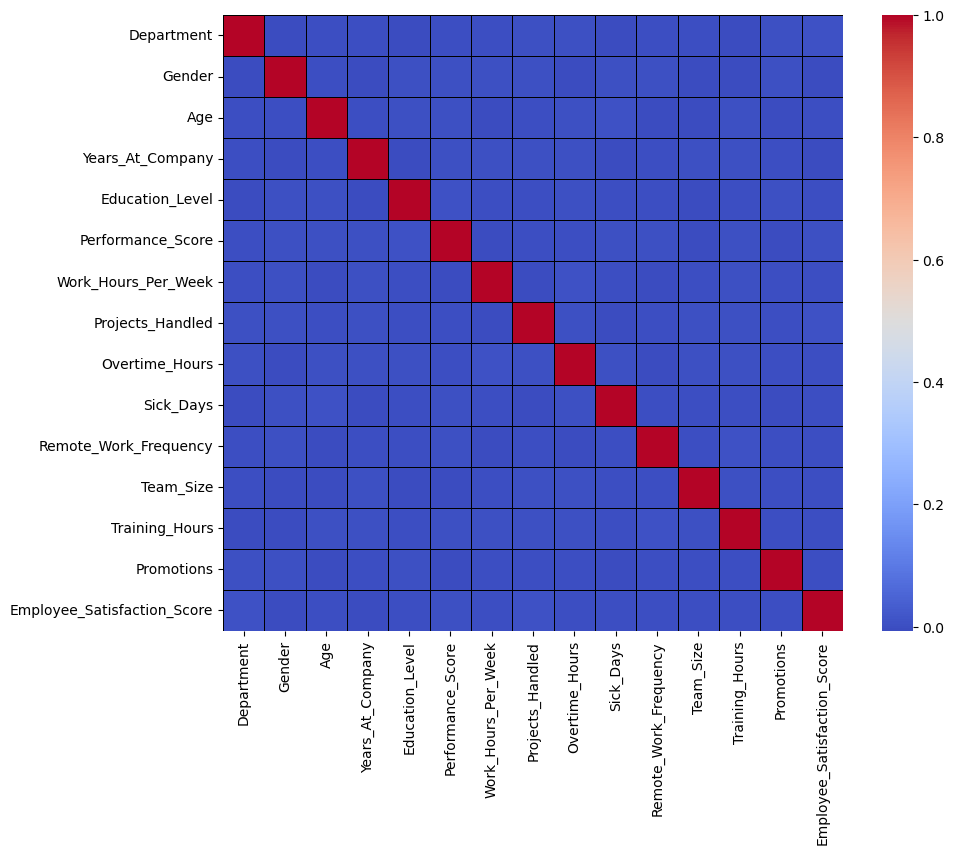

In [31]:
# Plot the correlation matrix
corr = perf_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, linecolor='black',
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [32]:
# Split the data into training and test data
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

In [35]:
# Decision tree model with different hyperparameters
perf_tree_pipe = Pipeline([
    ('transformer', coltransformer),
    ('tree', DecisionTreeClassifier(random_state=42))
])

perf_tree_params = {'tree__criterion' : ['gini', 'entropy'], 'tree__max_depth' : [5, 10, 20,30], 'tree__max_features' : ['sqrt', 'log2', None]}
perf_tree_grid = GridSearchCV(estimator = perf_tree_pipe, param_grid = perf_tree_params).fit(X_train_perf, y_train_perf)
perf_tree_score = perf_tree_grid.score(X_test_perf, y_test_perf)
perf_best_tree_model = perf_tree_grid.best_estimator_
perf_tree_mse = mean_squared_error(y_test_perf, perf_best_tree_model.predict(X_test_perf))

In [42]:
print('Decision Tree Score for predicting performance ', perf_tree_score)
print('Decision Tree MSE for predicting performance ', perf_tree_mse)

Decision Tree Score for predicting performance  0.1998
Decision Tree MSE for predicting performance  4.018


In [38]:
feature_df = pd.DataFrame({
    'features' : X_train_perf.columns,
    'importance' : perf_best_tree_model.named_steps['tree'].feature_importances_
})
feature_df = feature_df.sort_values(by='importance', ascending=False)
print('\n\n Most important features impacting performance as per DecisionTreeClassifier\n')
print(feature_df)



 Most important features impacting performance as per DecisionTreeClassifier

                       features  importance
13  Employee_Satisfaction_Score    0.120872
11               Training_Hours    0.118766
2                           Age    0.099242
5           Work_Hours_Per_Week    0.094772
6              Projects_Handled    0.094377
7                Overtime_Hours    0.092768
10                    Team_Size    0.071469
3              Years_At_Company    0.067597
0                    Department    0.063774
8                     Sick_Days    0.060359
9         Remote_Work_Frequency    0.045648
12                   Promotions    0.031416
4               Education_Level    0.029156
1                        Gender    0.009785


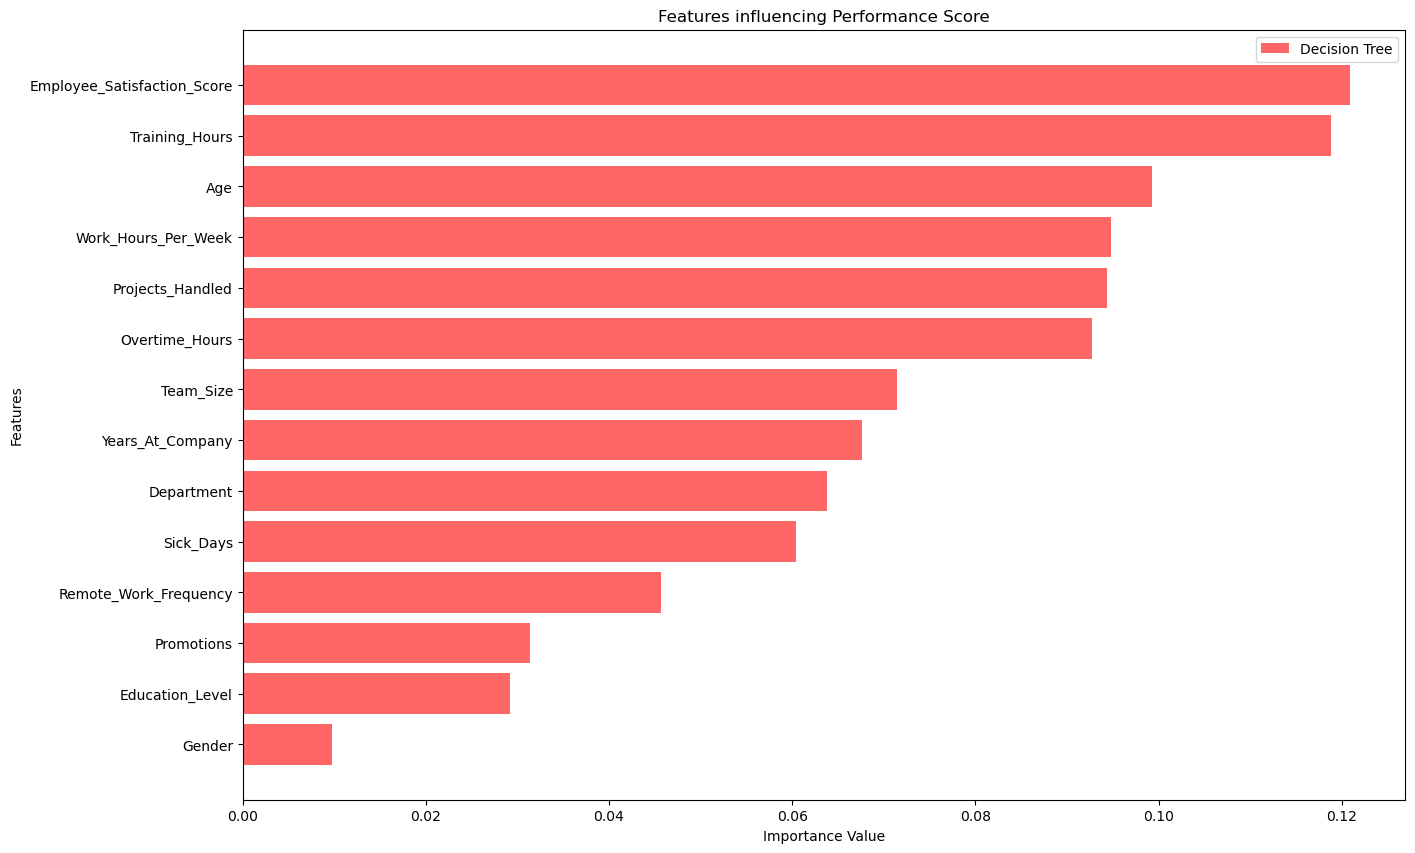

In [41]:
# Plotting the feature importances and coefficients
plt.figure(figsize=(15, 10))

# Plot Decision Tree feature importance
feature_df = feature_df.sort_values(by='importance', ascending=True)
plt.barh(feature_df['features'], feature_df['importance'], color='red', alpha=0.6, label='Decision Tree')

plt.xlabel('Importance Value')
plt.ylabel('Features')
plt.title('Features influencing Performance Score')
plt.legend()
plt.show()

### Summary
The factors that influence the performance score are Employee_satisfaction_score, training_hours and age. 

## **Goal 3 - calculate ideal monthly salary for employees**

To calculate monthly salary, we will use regression techniques. The factors that influence monthly salary are Performance_Score and Job_Title

In [53]:
salary_data = employee_df[['Performance_Score', 'Job_Title', 'Monthly_Salary']]
le = LabelEncoder()
salary_data['Job_Title'] = le.fit_transform(salary_data['Job_Title'])

/var/folders/5v/sr2ht7sj4rs8vbc79cjy7nl40000gn/T/ipykernel_7595/2121736537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data['Job_Title'] = le.fit_transform(salary_data['Job_Title'])


In [54]:
X_salary, y_salary = salary_data.drop('Monthly_Salary', axis=1), salary_data['Monthly_Salary']

In [55]:
# Split the data into training and test data
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

In [56]:
#sequential selector and linear regression
salary_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
    ('linreg', LinearRegression())
])
salary_pipe.fit(X_train_sal, y_train_sal)
seq_lin_reg_coefs = salary_pipe.named_steps['linreg'].coef_

seq_feature_names = salary_pipe.named_steps['poly_features'].get_feature_names_out()
seq_sel_feature_names = seq_feature_names[salary_pipe.named_steps['selector'].get_support()]

seq_df = pd.DataFrame({'feature': seq_sel_feature_names, 'coef': seq_lin_reg_coefs})

salary_pipe

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [57]:
print(seq_df.loc[seq_df['coef'] != 0])

                         feature        coef
0              Performance_Score  405.627720
1                      Job_Title  951.119420
2    Performance_Score Job_Title  131.433613
3                    Job_Title^2  -73.737564
4  Performance_Score Job_Title^2  -23.535533
5                    Job_Title^3  -17.539578


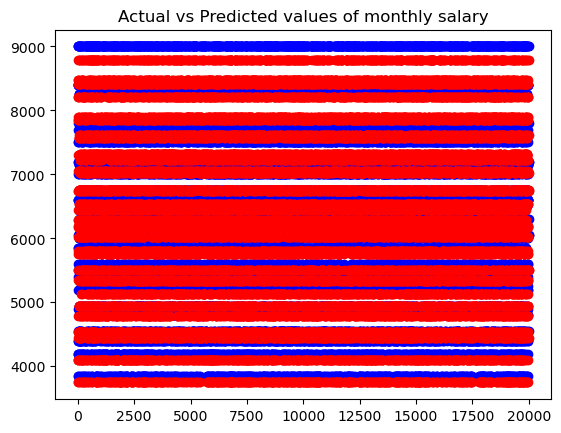

In [59]:
y_pred_sal = salary_pipe.predict(X_test_sal)
plt.scatter(range(len(y_test_sal)), y_test_sal, color='blue')
plt.scatter(range(len(y_pred_sal)), y_pred_sal, color='red')
plt.title('Actual vs Predicted values of monthly salary')
plt.show()

In [61]:
print("MSE ", mean_squared_error(y_test_sal, y_pred_sal))

MSE  226747.54307793628


### Summary
Monthly salary was determined using performance_score and Job_Title. Linear regression model was used to determine the coefficients. Using this technique, the MSE was 226747. 